In [155]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [156]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [157]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)


# Logistic Regression

In [158]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [159]:
clf.score(X_test, y_test)

0.9736842105263158

In [160]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [161]:
import numpy as np

def tpr(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fn = np.sum((y_pred != class_label) & (y_true == class_label))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

def fpr(y_pred, y_true, class_label):
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    tn = np.sum((y_pred != class_label) & (y_true != class_label))
    return fp / (fp + tn) if (fp + tn) > 0 else 0.0

def precision(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

def recall(y_pred, y_true, class_label):
    return tpr(y_pred, y_true, class_label)  # same as TPR

def f1score(y_pred, y_true, class_label):
    p = precision(y_pred, y_true, class_label)
    r = recall(y_pred, y_true, class_label)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0.0


In [162]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [163]:
y_score = clf.predict_proba(X_test)[:, 1] # target values
_, _, thresholds = roc_curve(y_test, y_score, pos_label=1)


In [164]:
results = []
y_pred = clf.predict(X_test)
for class_label in np.unique(y_test):
    label_name = iris.target_names[class_label]
    true_p = tpr(y_pred, y_test, class_label)
    false_p = fpr(y_pred, y_test, class_label)
    prec = precision(y_pred, y_test, class_label)
    rec = recall(y_pred, y_test, class_label)
    f = f1score(y_pred, y_test, class_label)

    results.append({
        "Class": label_name,
        "TPR (Recall)": round(true_p, 3),
        "FPR": round(false_p, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1 Score": round(f, 3)
    })

# --- Convert to Table ---
df_results = pd.DataFrame(results)
print(df_results)


        Class  TPR (Recall)    FPR  Precision  Recall  F1 Score
0      setosa         1.000  0.000        1.0   1.000     1.000
1  versicolor         0.938  0.000        1.0   0.938     0.968
2   virginica         1.000  0.034        0.9   1.000     0.947


In [165]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [166]:
for i in range(0,3):
    tpr, fpr, _ = roc_curve(y_test, y_score, pos_label=i)
    print(f"Class {i} - TPR: {tpr}, FPR: {fpr}, Thresholds: {thresholds}")

Class 0 - TPR: [0.   0.04 0.88 0.88 0.92 0.92 0.96 0.96 1.   1.  ], FPR: [0.         0.         0.         0.30769231 0.30769231 0.61538462
 0.61538462 0.92307692 0.92307692 1.        ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]
Class 1 - TPR: [0.         0.         0.         0.09090909 0.09090909 1.        ], FPR: [0.     0.0625 0.9375 0.9375 1.     1.    ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]
Class 2 - TPR: [0.         0.03448276 0.51724138 0.51724138 0.55172414 0.55172414
 0.68965517 0.68965517 0.82758621 0.82758621 0.96551724 0.96551724
 1.        ], FPR: [0.         0.         0.         0.22222222 0.22222222 0.66666667
 0.66666667 0.77777778 0.77777778 0.88888889 0.88888889 1.
 1.        ], Thresholds: [       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]


## ROC Curve

[       inf 0.9604359  0.68576527 0.35810822 0.31207251 0.0058202 ]


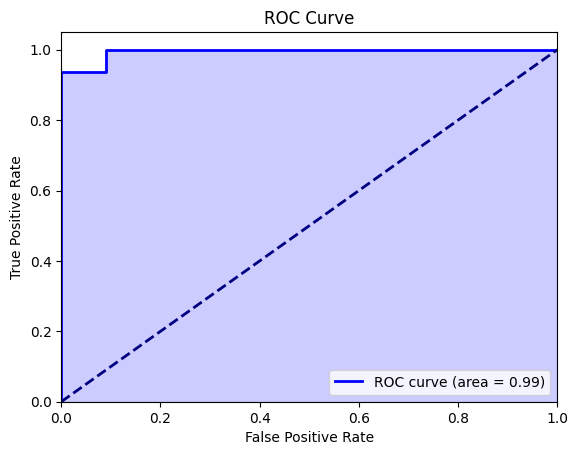

In [167]:
# Use the FPR and TPR arrays from roc_curve (cell 8)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
print(thresholds)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Classification of Digits Dataset using Logistic Regression #####

In [168]:
digits = load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [169]:
X_digits, y_digits = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=0)

In [170]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [171]:
clf.score(X_test, y_test)

0.9533333333333334

In [172]:
# coefficients
coefficients = clf.coef_
coefficients.shape

(10, 64)

In [173]:
y_pred = clf.coef_ @ X_test.T
y_pred = np.argmax(y_pred, axis=0)

In [174]:
y_pred_1= clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


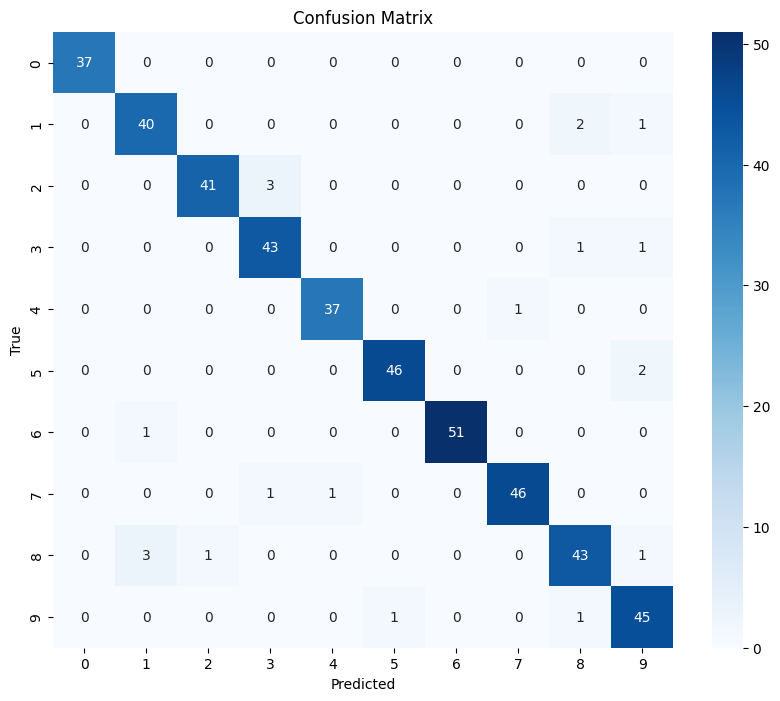

In [175]:
cm = confusion_matrix(y_test, y_pred_1)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [176]:
# saving this model as pickle file
import pickle
with open('models/logistic_regression_digits.pkl', 'wb') as f:
    pickle.dump(clf, f)
# Load the model from the pickle file
with open('models/logistic_regression_digits.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Checking if linear regression can be used for classification tasks. With Softmax activation function, it can be used for multi-class classification.

```python

score: 0.4
All predictions: [0 0 1 0 1 1 1 1 1 0]


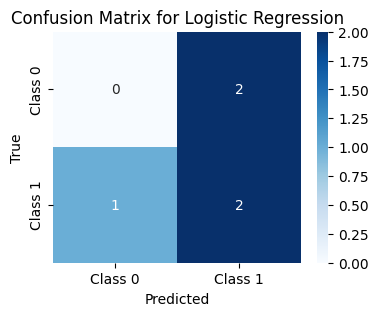

In [177]:
X = np.array([[1.9],
            [1.3],
            [3.5],
            [1.2],
            [9.5],
            [2.5],
            [7.5],
            [3.2],
            [4.2],
            [1.8],
        ])  # Each value is a sample with 1 feature
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])  # Example binary target variable
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X[:5], y[:5])
y_pred = clf.predict(X[5:])
print(f"score: {clf.score(X[5:], y[5:])}")
y_all_pred = clf.predict(X[:])
print(f"All predictions: {y_all_pred}")
cm = confusion_matrix(y[5:], y_pred)
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Logistic Regression but Linear Regression with Softmax activation function  

All predictions: [0 0 1 0 1 0 1 1 1 0]
score: 0.60


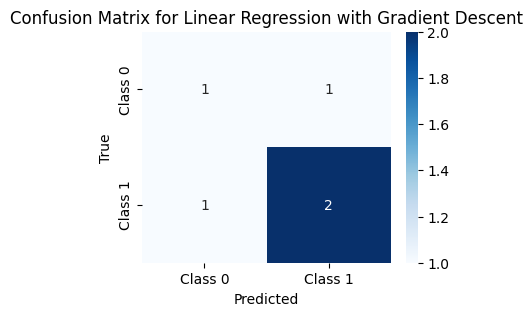

In [178]:
from sklearn.linear_model import LinearRegression
# linear regression from scratch using gradient descent
# X = np.array([[1.9],
#             [1.3],
#             [3.5],
#             [1.2],
#             [9.5],
#             [2.5],
#             [2.2],
#             [3.2],
#             [3.5],
#             [1.2]])  # Each value is a sample with 1 feature
# y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])  # Example binary target variable
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_predicted = np.dot(X, self.weights) + self.bias
        
        error = [y_predicted - y,]
        for _ in range(1, self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.sum(np.dot(X.T, (y_predicted - y)))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def predict(self, X):
        y = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(y)  # Apply sigmoid to get probabilities
        
        return y_pred >= 0.60
# Example usage
my_lr_model = LinearRegressionGD(learning_rate=0.01, n_iterations=30)
my_lr_model.fit(X[:5], y[:5])
y_pred = my_lr_model.predict(X[5:])

y_all_pred = my_lr_model.predict(X[:])
ones = np.ones_like(y_all_pred)
# convert boolean predictions to 0 and 1
y_all_pred = np.where(y_all_pred, ones, 1 - ones) 
print(f"All predictions: {y_all_pred}")
print(f"score: {accuracy_score(y[5:], y_pred):.2f}")
# confusion matrix
cm = confusion_matrix(y[5:], y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Linear Regression with Gradient Descent')
plt.show()
# Visualizing the predictions


## Decision Trees

In [179]:
import numpy as np

# Feature options
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
subjects = ['me', 'you', 'they', 'us', 'them', 'all']

# Generate 100 samples
np.random.seed()  # for reproducibility
X = np.array([[np.random.choice(colors), np.random.choice(subjects)] for _ in range(100)])

# Generate target labels randomly between 0 and 1
y = np.random.randint(0, 2, size=100)


In [180]:
# label encoding
df = pd.DataFrame(X, columns=['color', 'person'])
df['label'] = y


In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [182]:
for col in df.columns:
    df[col] = le.fit_transform(df[col]) 


In [183]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()  


In [184]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[['color', 'person']], df['label'], test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [185]:
clf.score(X_test, y_test)

0.6

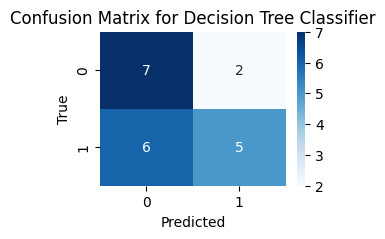

In [186]:
# confusion matrix
y_pred = clf.predict(X_test[['color', 'person']])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


0.4


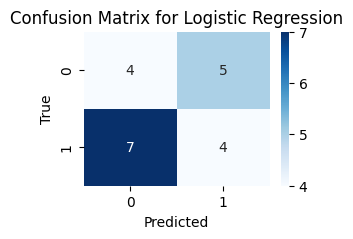

In [187]:
logR = LogisticRegression(max_iter=200)
logR.fit(X_train, y_train)
print(logR.score(X_test, y_test))

# confusion matrix for logistic regression
y_pred = logR.predict(X_test[['color', 'person']])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


- we see that logistic regression has performed worse than decision trees, which is expected as decision trees can capture non-linear relationships in the data.

# Random Forest Classifier
```python

In [188]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=381)

In [189]:
# importing all classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier



In [190]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [191]:
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [192]:
# logistic regression
logR_clf = LogisticRegression(max_iter=200)
logR_clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [193]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [194]:
# testing the classifiers
print(f"Decision Tree Classifier Score: {dt_clf.score(X_test, y_test)}")
print(f"SVC Classifier Score: {svc_clf.score(X_test, y_test)}")
print(f"Logistic Regression Classifier Score: {logR_clf.score(X_test, y_test)}")
print(f"Random Forest Classifier Score: {rf_clf.score(X_test, y_test)}")

Decision Tree Classifier Score: 0.8755555555555555
SVC Classifier Score: 0.9955555555555555
Logistic Regression Classifier Score: 0.9711111111111111
Random Forest Classifier Score: 0.9844444444444445


In [195]:
# tweaking parameters of each model and fitting again to compare score
dt_clf = DecisionTreeClassifier(ccp_alpha=0.00001)
dt_clf.fit(X_train, y_train)
svc_clf = SVC(probability=True, C=3.33, kernel='poly', degree=3, gamma='scale')
svc_clf.fit(X_train, y_train)
logR_clf = LogisticRegression(max_iter=200, C=3.33, multi_class='auto')
logR_clf.fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=100)
rf_clf.fit(X_train, y_train)
"ok"

d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


'ok'

In [196]:

print(f"Decision Tree Classifier Score after tweaking: {dt_clf.score(X_test, y_test)}")
print(f"SVC Classifier Score after tweaking: {svc_clf.score(X_test, y_test)}")
print(f"Logistic Regression Classifier Score after tweaking: {logR_clf.score(X_test, y_test)}")
print(f"Random Forest Classifier Score after tweaking: {rf_clf.score(X_test, y_test)}")
# Default parameters of each classifier work better than the tuned parameters

Decision Tree Classifier Score after tweaking: 0.8733333333333333
SVC Classifier Score after tweaking: 0.9888888888888889
Logistic Regression Classifier Score after tweaking: 0.9688888888888889
Random Forest Classifier Score after tweaking: 0.9711111111111111


- Default parameters of each classifier work better than the tuned parameters.

In [197]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target    
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


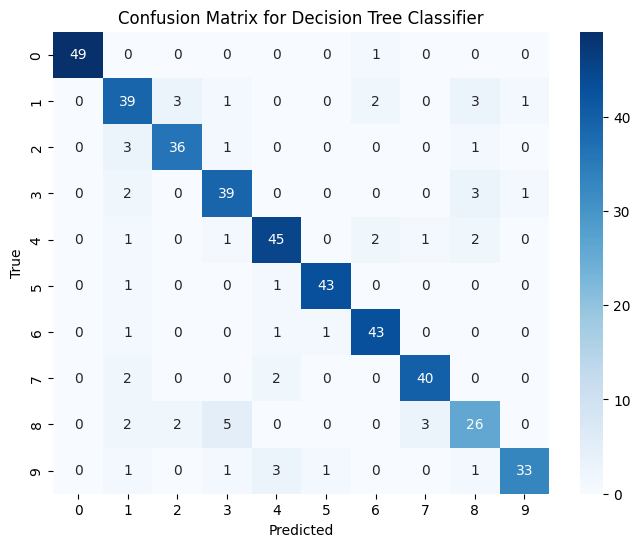

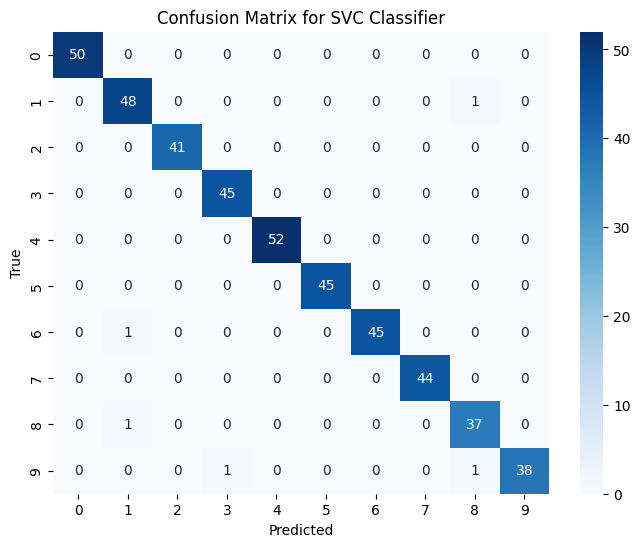

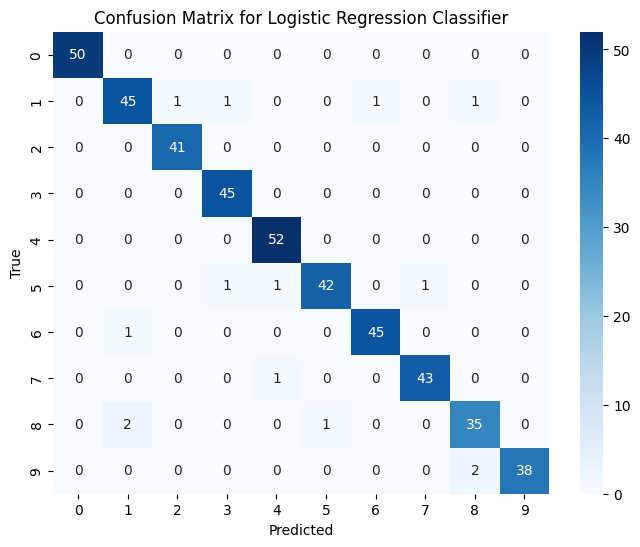

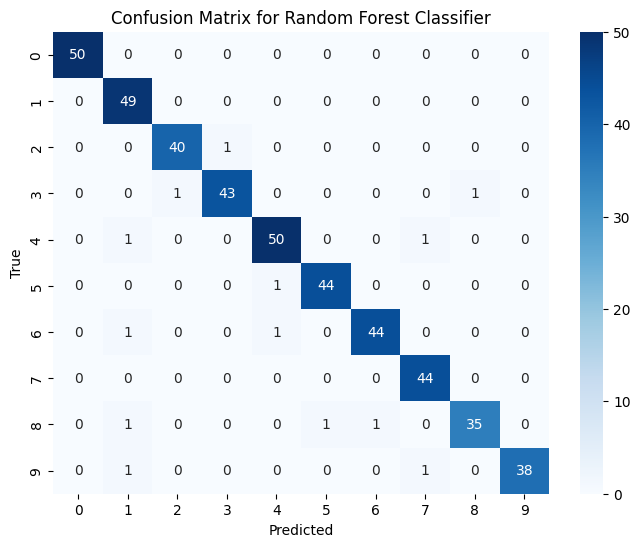

In [198]:
# confusion matrix for all models
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()
plot_confusion_matrix(dt_clf, X_test, y_test, "Decision Tree Classifier")
plot_confusion_matrix(svc_clf, X_test, y_test, "SVC Classifier")
plot_confusion_matrix(logR_clf, X_test, y_test, "Logistic Regression Classifier")
plot_confusion_matrix(rf_clf, X_test, y_test, "Random Forest Classifier")

In [199]:
# macro and micro average data frame for all models
def get_macro_micro_df(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate macro and micro averages
    macro_avg = np.mean(cm.diagonal() / cm.sum(axis=1))
    micro_avg = np.sum(cm.diagonal()) / np.sum(cm)
    
    return pd.DataFrame({
        'Model': [model_name],
        'Macro Average': [macro_avg],
        'Micro Average': [micro_avg]
    })

In [200]:
res = {}
res['Decision Tree Classifier'] = get_macro_micro_df(dt_clf, X_test, y_test, "Decision Tree Classifier")
res['SVC Classifier'] = get_macro_micro_df(svc_clf, X_test, y_test, "SVC Classifier")
res['Logistic Regression Classifier'] = get_macro_micro_df(logR_clf, X_test, y_test, "Logistic Regression Classifier")
res['Random Forest Classifier'] = get_macro_micro_df(rf_clf, X_test, y_test, "Random Forest Classifier")
macro_micro_df = pd.concat(res.values(), ignore_index=True)
macro_micro_df

,Model,Macro Average,Micro Average
0,Decision Tree Classifier,0.869466,0.873333
1,SVC Classifier,0.988154,0.988889
2,Logistic Regression Classifier,0.967829,0.968889
3,Random Forest Classifier,0.969806,0.971111


## Cross Validation

In [201]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Cross-validation for each model
cv_results = {}
for model, name in zip([dt_clf, svc_clf, logR_clf, rf_clf], 
                       ["Decision Tree", "SVC", "Logistic Regression", "Random Forest"]):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    cv_results[name] = scores

d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Conda\envs\insta\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be re

In [202]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df['Mean'] = cv_results_df.mean(axis=1)
cv_results_df

,Decision Tree,SVC,Logistic Regression,Random Forest,Mean
0,0.844444,0.992593,0.955556,0.985185,0.944444
1,0.837037,0.992593,0.948148,0.970370,0.937037
2,0.814815,0.955556,0.948148,0.955556,0.918519
3,0.837037,0.970370,0.962963,0.962963,0.933333
4,0.829630,0.985185,0.955556,0.948148,0.929630
5,0.844444,0.992593,0.962963,0.962963,0.940741
6,0.866667,1.000000,0.977778,0.955556,0.950000
7,0.873134,0.977612,0.940299,0.962687,0.938433
8,0.828358,0.977612,0.962687,0.955224,0.930970
9,0.880597,0.992537,0.947761,0.970149,0.947761


In [203]:
cv_results_df.describe()

,Decision Tree,SVC,Logistic Regression,Random Forest,Mean
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.845616,0.983665,0.956186,0.962880,0.937087
std,0.021281,0.013446,0.010820,0.010485,0.009439
min,0.814815,0.955556,0.940299,0.948148,0.918519
25%,0.831481,0.977612,0.948148,0.955556,0.931561
50%,0.840741,0.988861,0.955556,0.962825,0.937735
75%,0.861111,0.992593,0.962894,0.968353,0.943519
max,0.880597,1.000000,0.977778,0.985185,0.950000


In [204]:
# The best model is the one with the highest average score.
# Let's compare the mean cross-validation scores for each model:
best_model_name = cv_results_df[['Decision Tree', 'SVC', 'Logistic Regression', 'Random Forest']].mean().idxmax()
best_score = cv_results_df[best_model_name].mean()
print(f"The best model to use is: {best_model_name} (mean CV score: {best_score:.3f})")

The best model to use is: SVC (mean CV score: 0.984)


In [212]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report

# Naive Bayes Classifier

In [251]:
# dataset for spam and not spam
from sklearn.datasets import fetch_openml
spam_data = fetch_openml('spambase', version=1, as_frame=True)
spam_df = spam_data.frame
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [252]:
X = spam_df.drop(columns=['class'])
y = spam_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=381)

## Gaussian Naive Bayes Classifier from Scratch

In [253]:
# naive bayes classifier from scratch

class NaiveBayes:
    def __init__(self):
        self.class_priors = {} # to store prior probabilities of each class; 
        # prior probability is the probability of a class before observing any features
        # calculated as the number of instances of the class divided by the total number of instances
        # e.g. P(class) = count(class) / total_count
        self.feature_likelihoods = {}
        # to store likelihoods of features given each class;
        # likelihood is the probability of a feature given a class
        # calculated as the mean and standard deviation of the feature values for each class

    def fit(self, X, y):
        self.classes = np.unique(y) # unique classes in the target variable spam or not spam
        for cls in self.classes: # runs for each class i.e. spam and not spam
            X_cls = X[y == cls] # split the dataset into instances of the current class
            self.class_priors[cls] = len(X_cls) / len(X) # ratio of instances of the class to total instances
            # calculate the prior probability of the class
            # e.g. P(spam) = count(spam) / total_count

            # calculate the mean and standard deviation of each feature for the current class
            # these will be used to calculate the likelihood of the features given the class
            self.feature_likelihoods[cls] = (X_cls.mean(), X_cls.std())

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows(): # iterate over each row in the test set
            # row has the feature values for a single instance
            class_probs = {}
            for cls in self.classes:
                mean, std = self.feature_likelihoods[cls]
                likelihood = np.exp(-0.5 * ((row - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi)) # Gaussian likelihood for continuous features
                # likelihood is calculated using the Gaussian distribution formula
                class_probs[cls] = self.class_priors[cls] * likelihood.prod() 
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)
# Example usage


In [254]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)


In [255]:
# Display predictions and evaluate model
accuracy = accuracy_score(y_test, predictions)


In [256]:
# naive bayes from sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train, sample_weight=None)

,priors,None
,var_smoothing,1e-09


In [257]:
print(f"Scratch Accuracy and Report: {accuracy:.2f}")
print(classification_report(y_test, predictions))
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Accuracy and Report: {accuracy:.2f}")
print(classification_report(y_test, gnb_predictions))

Scratch Accuracy and Report: 0.77
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      2368
           1       0.64      0.92      0.76      1543

    accuracy                           0.77      3911
   macro avg       0.78      0.79      0.77      3911
weighted avg       0.81      0.77      0.77      3911

Accuracy and Report: 0.77
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2368
           1       0.71      0.94      0.81      1543

    accuracy                           0.82      3911
   macro avg       0.83      0.84      0.82      3911
weighted avg       0.85      0.82      0.82      3911



In [258]:
# dataset categorical for naive bayes from scratch
from sklearn.datasets import fetch_openml
categorical_data = fetch_openml('adult', version=2, as_frame=True)
df = categorical_data.frame
# Display first few rows of the categorical dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [259]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [260]:
# dummies for class
df['class'] = df['class'].map({'<=50K': 0, '>50K': 1})


In [262]:
# count values for all columns
for col in df.columns:
    print(f"{col}: {df[col].nunique()}\t")

age: 74	
workclass: 8	
fnlwgt: 28523	
education: 16	
education-num: 16	
marital-status: 7	
occupation: 14	
relationship: 6	
race: 5	
sex: 2	
capital-gain: 123	
capital-loss: 99	
hours-per-week: 96	
native-country: 41	
class: 2	


In [263]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [264]:
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [265]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [266]:
# drop native country column from df
df.drop(columns='native-country', inplace=True)



In [267]:
# one hot encode categorical columns
# exclude nativ-country from list categorical_cols - ['native-country']
categorical_cols.remove('native-country')  # remove 'native-country' from the list
categorical_cols.remove('class')  # remove 'class' from the list as it is the target variable
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,226802,7,0,0,40,0,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,89814,9,0,0,50,0,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,336951,12,0,0,40,1,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,160323,10,7688,0,40,1,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [268]:
df_cat = df.select_dtypes(include=['bool']).copy()
df_cat.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [269]:
df_cat.shape

(48842, 51)

## Bernoulli Naive Bayes Classifier from Scratch

In [270]:
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}  # P(class)
        self.feature_likelihoods = {}  # P(feature=1 | class)

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]  # rows where y == current class
            self.class_priors[cls] = len(X_cls) / len(X)

            # Calculate likelihood P(feature_i = 1 | class)
            # Add Laplace smoothing to avoid zero probability
            likelihood = (X_cls.sum() + 1) / (len(X_cls) + 2)
            self.feature_likelihoods[cls] = likelihood

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            class_probs = {}
            for cls in self.classes:
                likelihood = self.feature_likelihoods[cls]
                # Bernoulli likelihood: P(x|y) = p^x * (1-p)^(1-x)
                prob = np.prod(
                    row * likelihood + (1 - row) * (1 - likelihood)
                )
                class_probs[cls] = self.class_priors[cls] * prob

            # Choose class with max probability
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cat, df['class'], test_size=0.85, random_state=381)

In [ ]:
nb_cat = NaiveBayes()
nb_cat.fit(df_cat, df['class'])
nb_cat_predictions = nb_cat.predict(X_test)
# Display predictions and evaluate model
accuracy = accuracy_score(y_test, nb_cat_predictions)


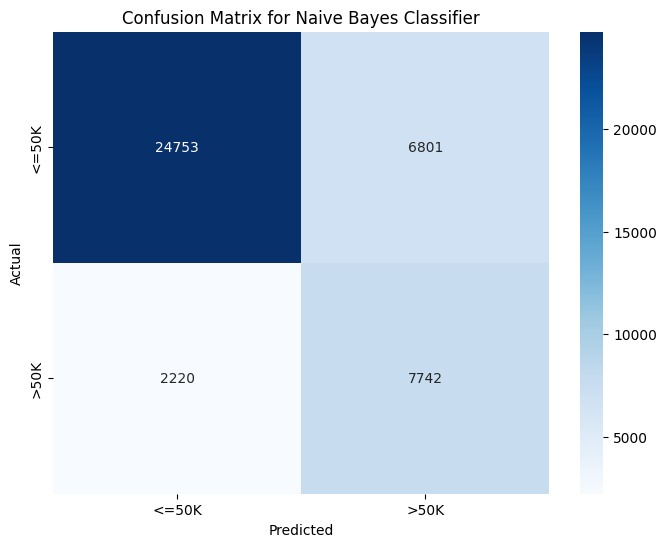

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, nb_cat_predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()




In [ ]:

print("Accuracy: ", accuracy)
print(classification_report(y_test, nb_cat_predictions))





Accuracy:  0.7827102803738317
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     31554
           1       0.53      0.78      0.63      9962

    accuracy                           0.78     41516
   macro avg       0.73      0.78      0.74     41516
weighted avg       0.83      0.78      0.79     41516



In [ ]:
# nb from sklearn
from sklearn.naive_bayes import BernoulliNB
nb_sklearn = BernoulliNB()
nb_sklearn.fit(X_train, y_train)
nb_sklearn_predictions = nb_sklearn.predict(X_test)
# Display predictions and evaluate model
accuracy = accuracy_score(y_test, nb_sklearn_predictions)
print("Accuracy: ", accuracy)
print(classification_report(y_test, nb_sklearn_predictions))


Accuracy:  0.7781578186723191
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     31554
           1       0.53      0.78      0.63      9962

    accuracy                           0.78     41516
   macro avg       0.72      0.78      0.74     41516
weighted avg       0.82      0.78      0.79     41516



In [ ]:
# gaussian nb
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train, sample_weight=None)
# Display predictions and evaluate model
gnb_predictions = gnb.predict(X_test)
accuracy = accuracy_score(y_test, gnb_predictions)
print("Accuracy: ", accuracy)
print(classification_report(y_test, gnb_predictions))

Accuracy:  0.7057038250313132
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     31554
           1       0.44      0.87      0.59      9962

    accuracy                           0.71     41516
   macro avg       0.69      0.76      0.68     41516
weighted avg       0.82      0.71      0.73     41516



# Multinomial Naive Bayes
text dataset

In [ ]:
# generate dummy dataset for text,class 
df = pd.read_csv('data/email_spam_ham.csv')
df.shape

(5171, 4)

In [ ]:
df = df[['text', 'label_num']]
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# cleaning text data
import re
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text
df['text'] = df['text'].apply(clean_text)
df.head()

,text,label_num
0,subject enron methanol meter 988291 this is a ...,0
1,subject hpl nom for january 9 2001 see attache...,0
2,subject neon retreat ho ho ho we re around to ...,0
3,subject photoshop windows office cheap main tr...,1
4,subject re indian springs this deal is to book...,0


In [ ]:
# tf idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_transform = vectorizer.fit_transform(df['text'])


In [ ]:

y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.85, random_state=381)

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'],
      shape=(50447,), dtype=object)

In [ ]:
# accurcay
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predictions = mnb.predict(X_test)
accuracy = accuracy_score(y_test, mnb_predictions)
print("Accuracy: ", accuracy)
print(classification_report(y_test, mnb_predictions))


Accuracy:  0.7484076433121019
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3134
           1       1.00      0.12      0.22      1262

    accuracy                           0.75      4396
   macro avg       0.87      0.56      0.54      4396
weighted avg       0.81      0.75      0.67      4396



In [ ]:
# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])
idx = int(0.8*len(df))

pipeline.fit(df['text'][:idx], df['label_num'][:idx])


,steps,"[('tfidf', ...), ('mnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
accuracy = pipeline.score(df['text'][idx:], df['label_num'][idx:])

In [ ]:
print("Pipeline Accuracy: ", accuracy)
predictions = pipeline.predict(df['text'][idx:])
print(classification_report(df['label_num'][idx:], predictions))

Pipeline Accuracy:  0.8502415458937198
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       715
           1       1.00      0.52      0.68       320

    accuracy                           0.85      1035
   macro avg       0.91      0.76      0.79      1035
weighted avg       0.88      0.85      0.83      1035

